# **Clone Project Repository and Install Dependencies**

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd /kaggle/working/yolov5

%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5519.7/8062.4 GB disk)


# **Download Pretrained Weights**

In [2]:
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'yolov5/weights/yolov5{x}.pt')

100%|██████████| 4.11M/4.11M [00:00<00:00, 50.3MB/s]

100%|██████████| 14.9M/14.9M [00:00<00:00, 130MB/s]

100%|██████████| 42.4M/42.4M [00:00<00:00, 219MB/s] 

100%|██████████| 91.9M/91.9M [00:00<00:00, 277MB/s]

100%|██████████| 170M/170M [00:00<00:00, 281MB/s] 



# **Download Dataset from [roboflow](https://app.roboflow.com/uiu-lxaq9/fydp-vmxwc/19)**

In [3]:
%cd /kaggle/working/yolov5
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BmOQVSckGdhRKhCcE4hR")
project = rf.workspace("uiu-lxaq9").project("fydp-vmxwc")
dataset = project.version(19).download("yolov5")

/kaggle/working/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    


Extracting Dataset Version Zip to FYDP-19 in yolov5pytorch:: 100%|██████████| 4346/4346 [00:00<00:00, 5767.21it/s]


# **Dataset**

In [4]:
%cat {dataset.location}/data.yaml

names:
- advertisement
- caption
- image
- page number
- paragraph
- table
- text
- title
nc: 8
roboflow:
  license: CC BY 4.0
  project: fydp-vmxwc
  url: https://universe.roboflow.com/uiu-lxaq9/fydp-vmxwc/dataset/19
  version: 19
  workspace: uiu-lxaq9
test: ../test/images
train: FYDP-19/train/images
val: FYDP-19/valid/images


# **Training**

In [5]:
%cd /kaggle/working/yolov5
!python segment/train.py --img 320 --batch 128 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt --name custom-dataset
#display.Image(filename=f'/kaggle/working/yolov5/runs/train-seg/custom-dataset/results.png', width=1200)

/kaggle/working/yolov5
2024-04-02 14:41:17.715013: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-02 14:41:17.715148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-02 14:41:17.888745: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=yolov5s-seg.pt, cfg=, data=/kaggle/working/yolov5/FYDP-19/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, sing

# **Training Result Graph**

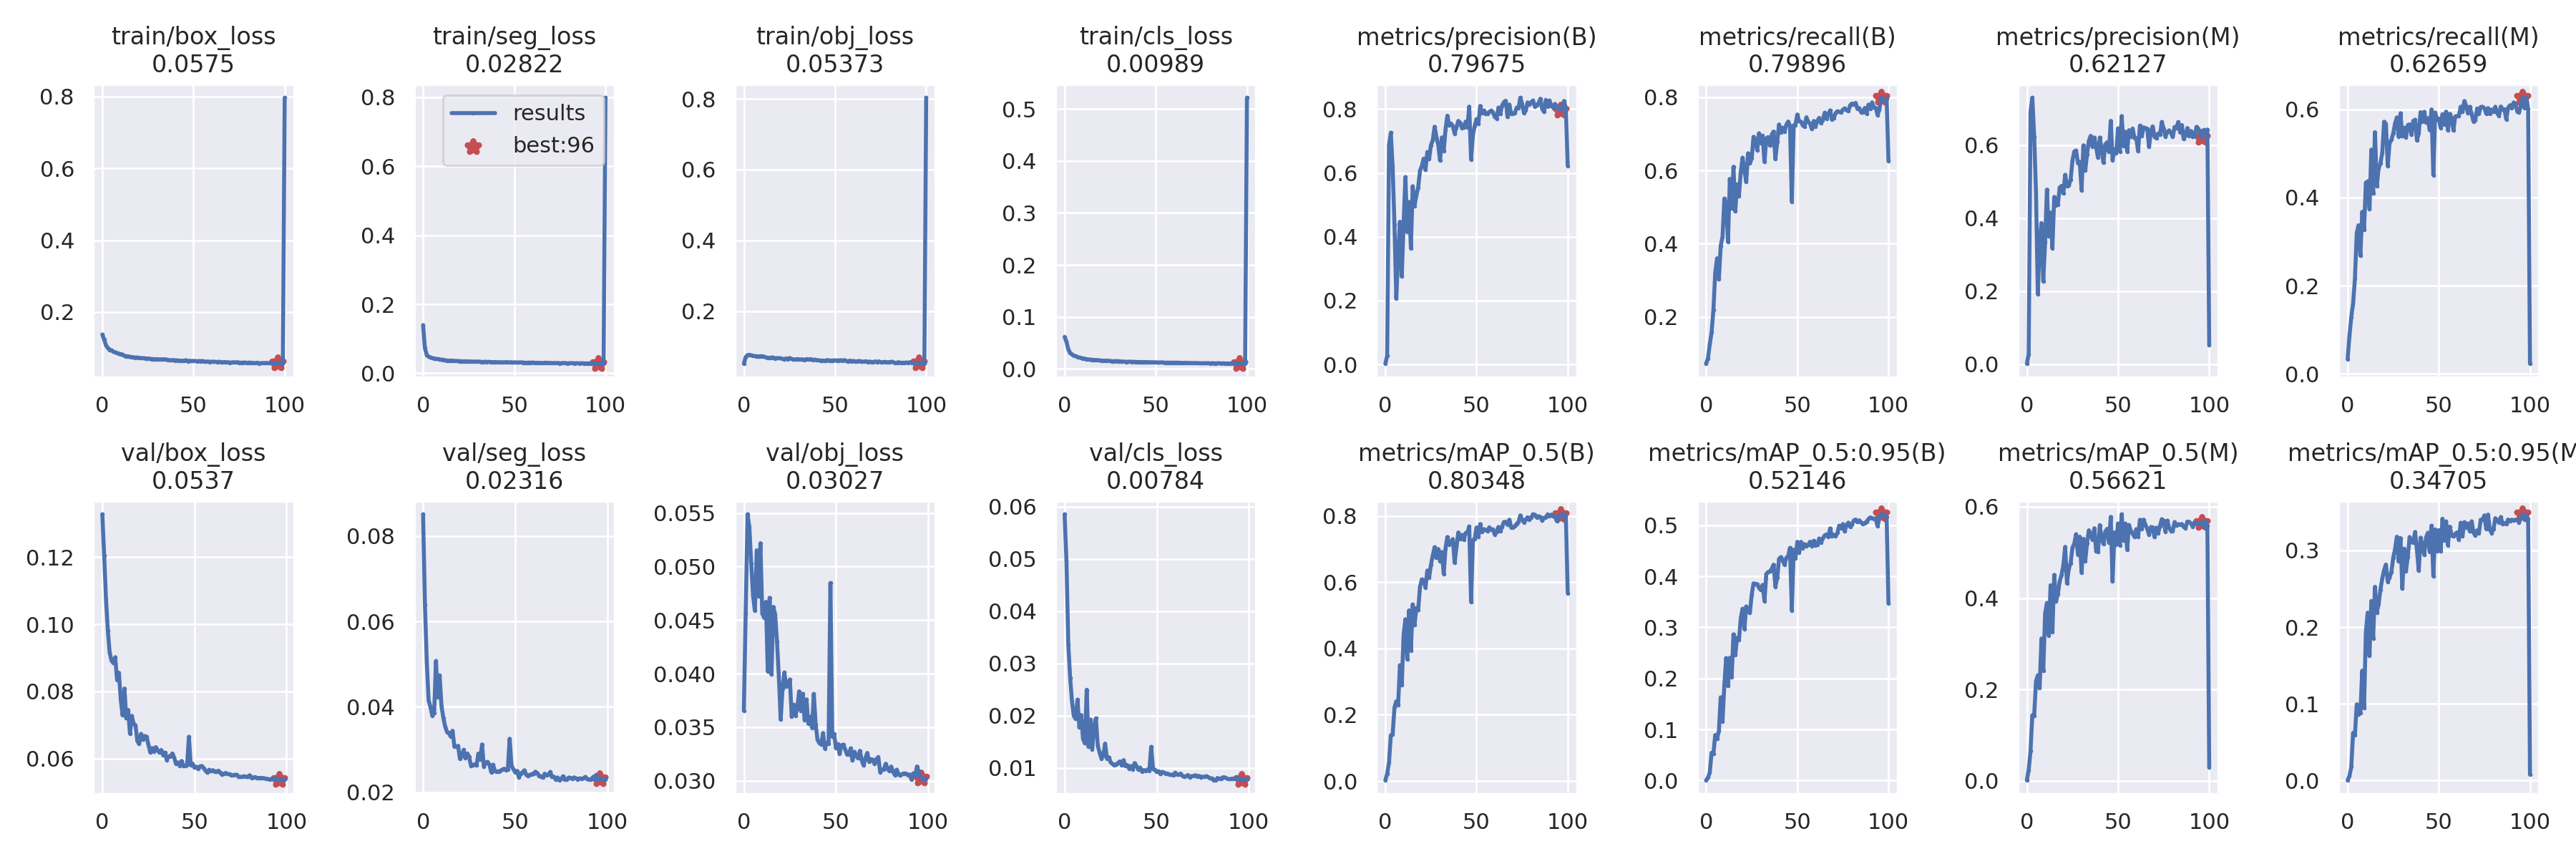

In [16]:
from IPython.display import display, Image

Image(filename="/kaggle/working/yolov5/runs/train-seg/custom-dataset/results.png", width=900)

# **Label Data Correlogram**

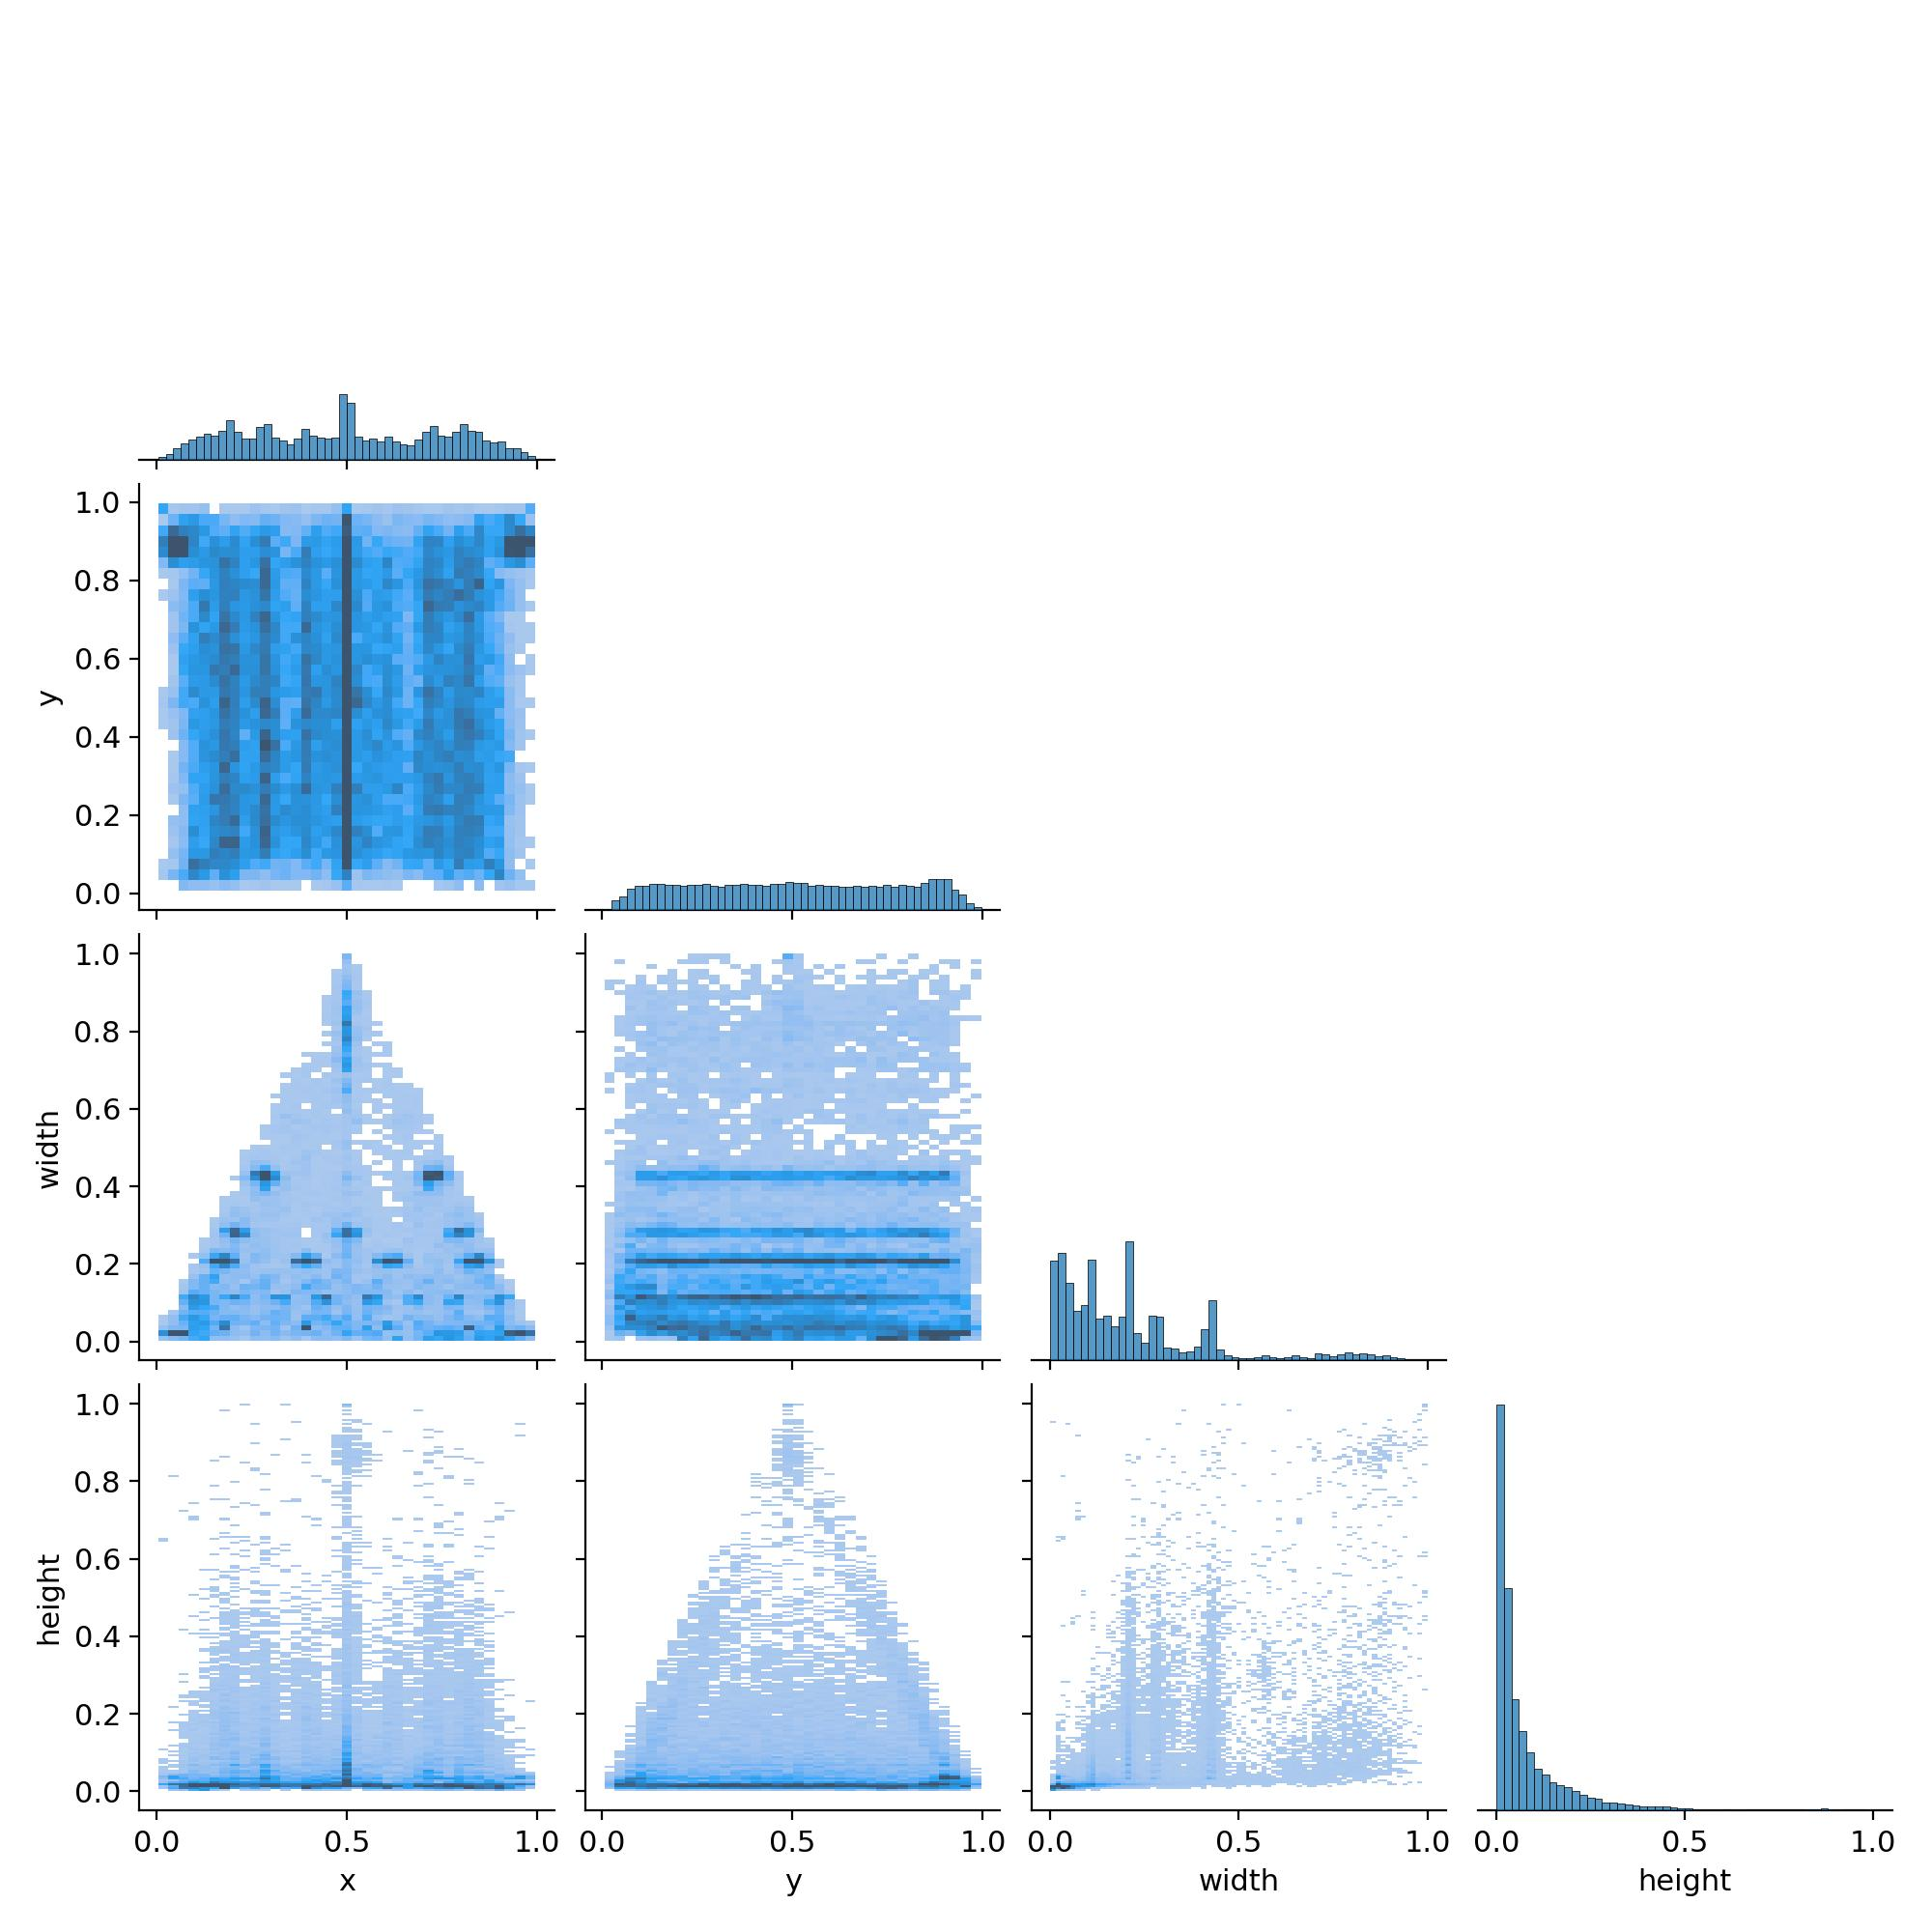

In [17]:
Image(filename="/kaggle/working/yolov5/runs/train-seg/custom-dataset/labels_correlogram.jpg", width=900)

# **Label Graph**

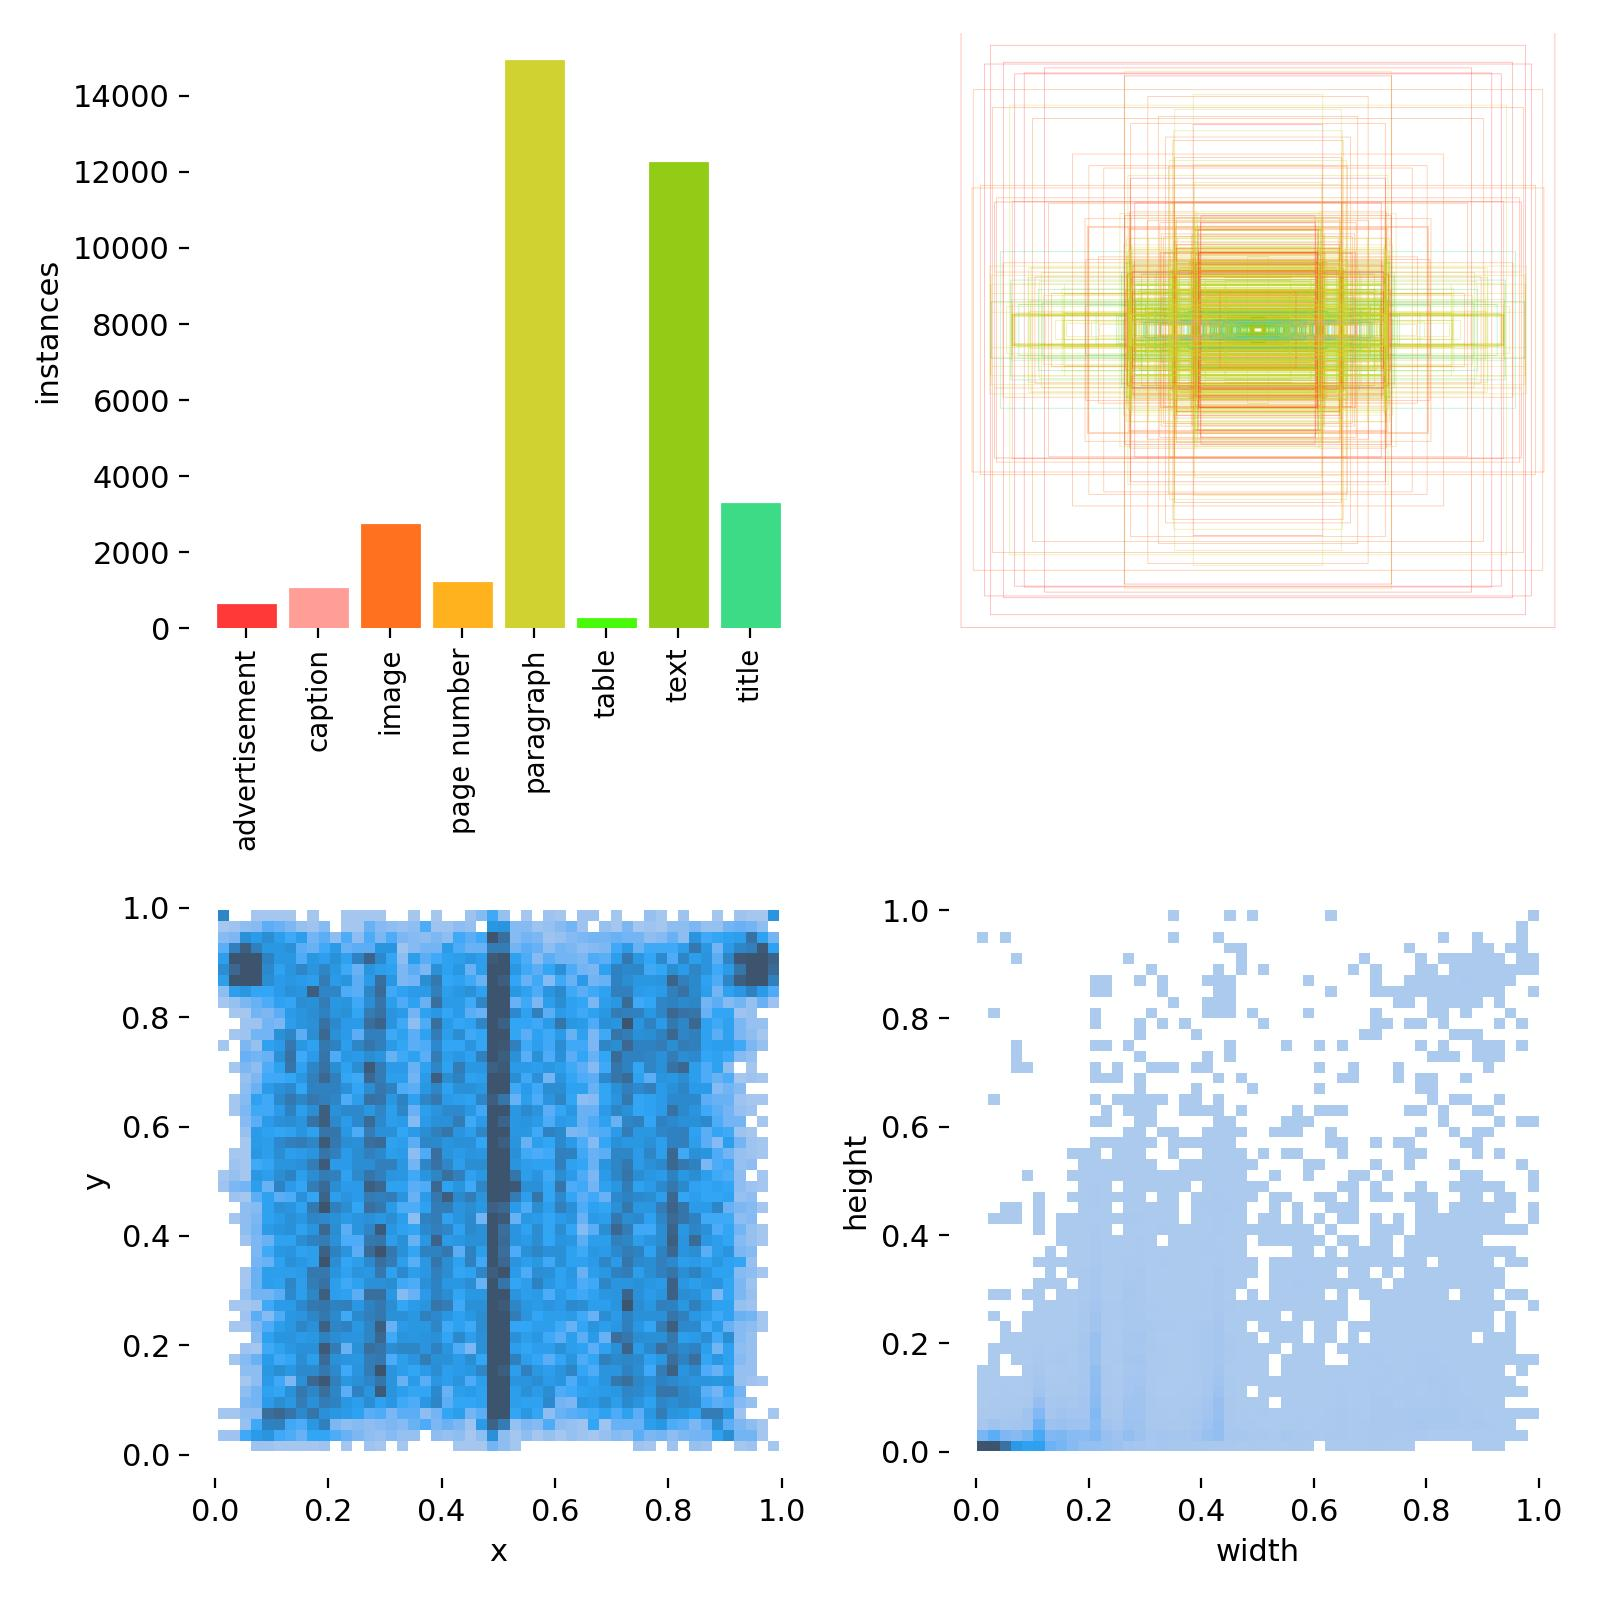

In [18]:
Image(filename="/kaggle/working/yolov5/runs/train-seg/custom-dataset/labels.jpg", width=900)

# **Validation**

In [9]:
# %cd /kaggle/working/yolov5
!python /kaggle/working/yolov5/segment/val.py --weights /kaggle/working/yolov5/runs/train-seg/custom-dataset/weights/best.pt --data {dataset.location}/data.yaml --img 320  --name custom-dataset

segment/val: data=/kaggle/working/yolov5/FYDP-19/data.yaml, weights=['/kaggle/working/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=custom-dataset, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7417301 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /kaggle/working/yolov5/FYDP-19/valid/labels.cache... 325 images, 0
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        325       6269      0.797      0.799      0.803      0.523      0.628      0.608      0.569      0.359
         advertisement        325        143      0.846       0.86      0.909      0.761 

# **Validation Result Graph**

# **Confusion Graph**

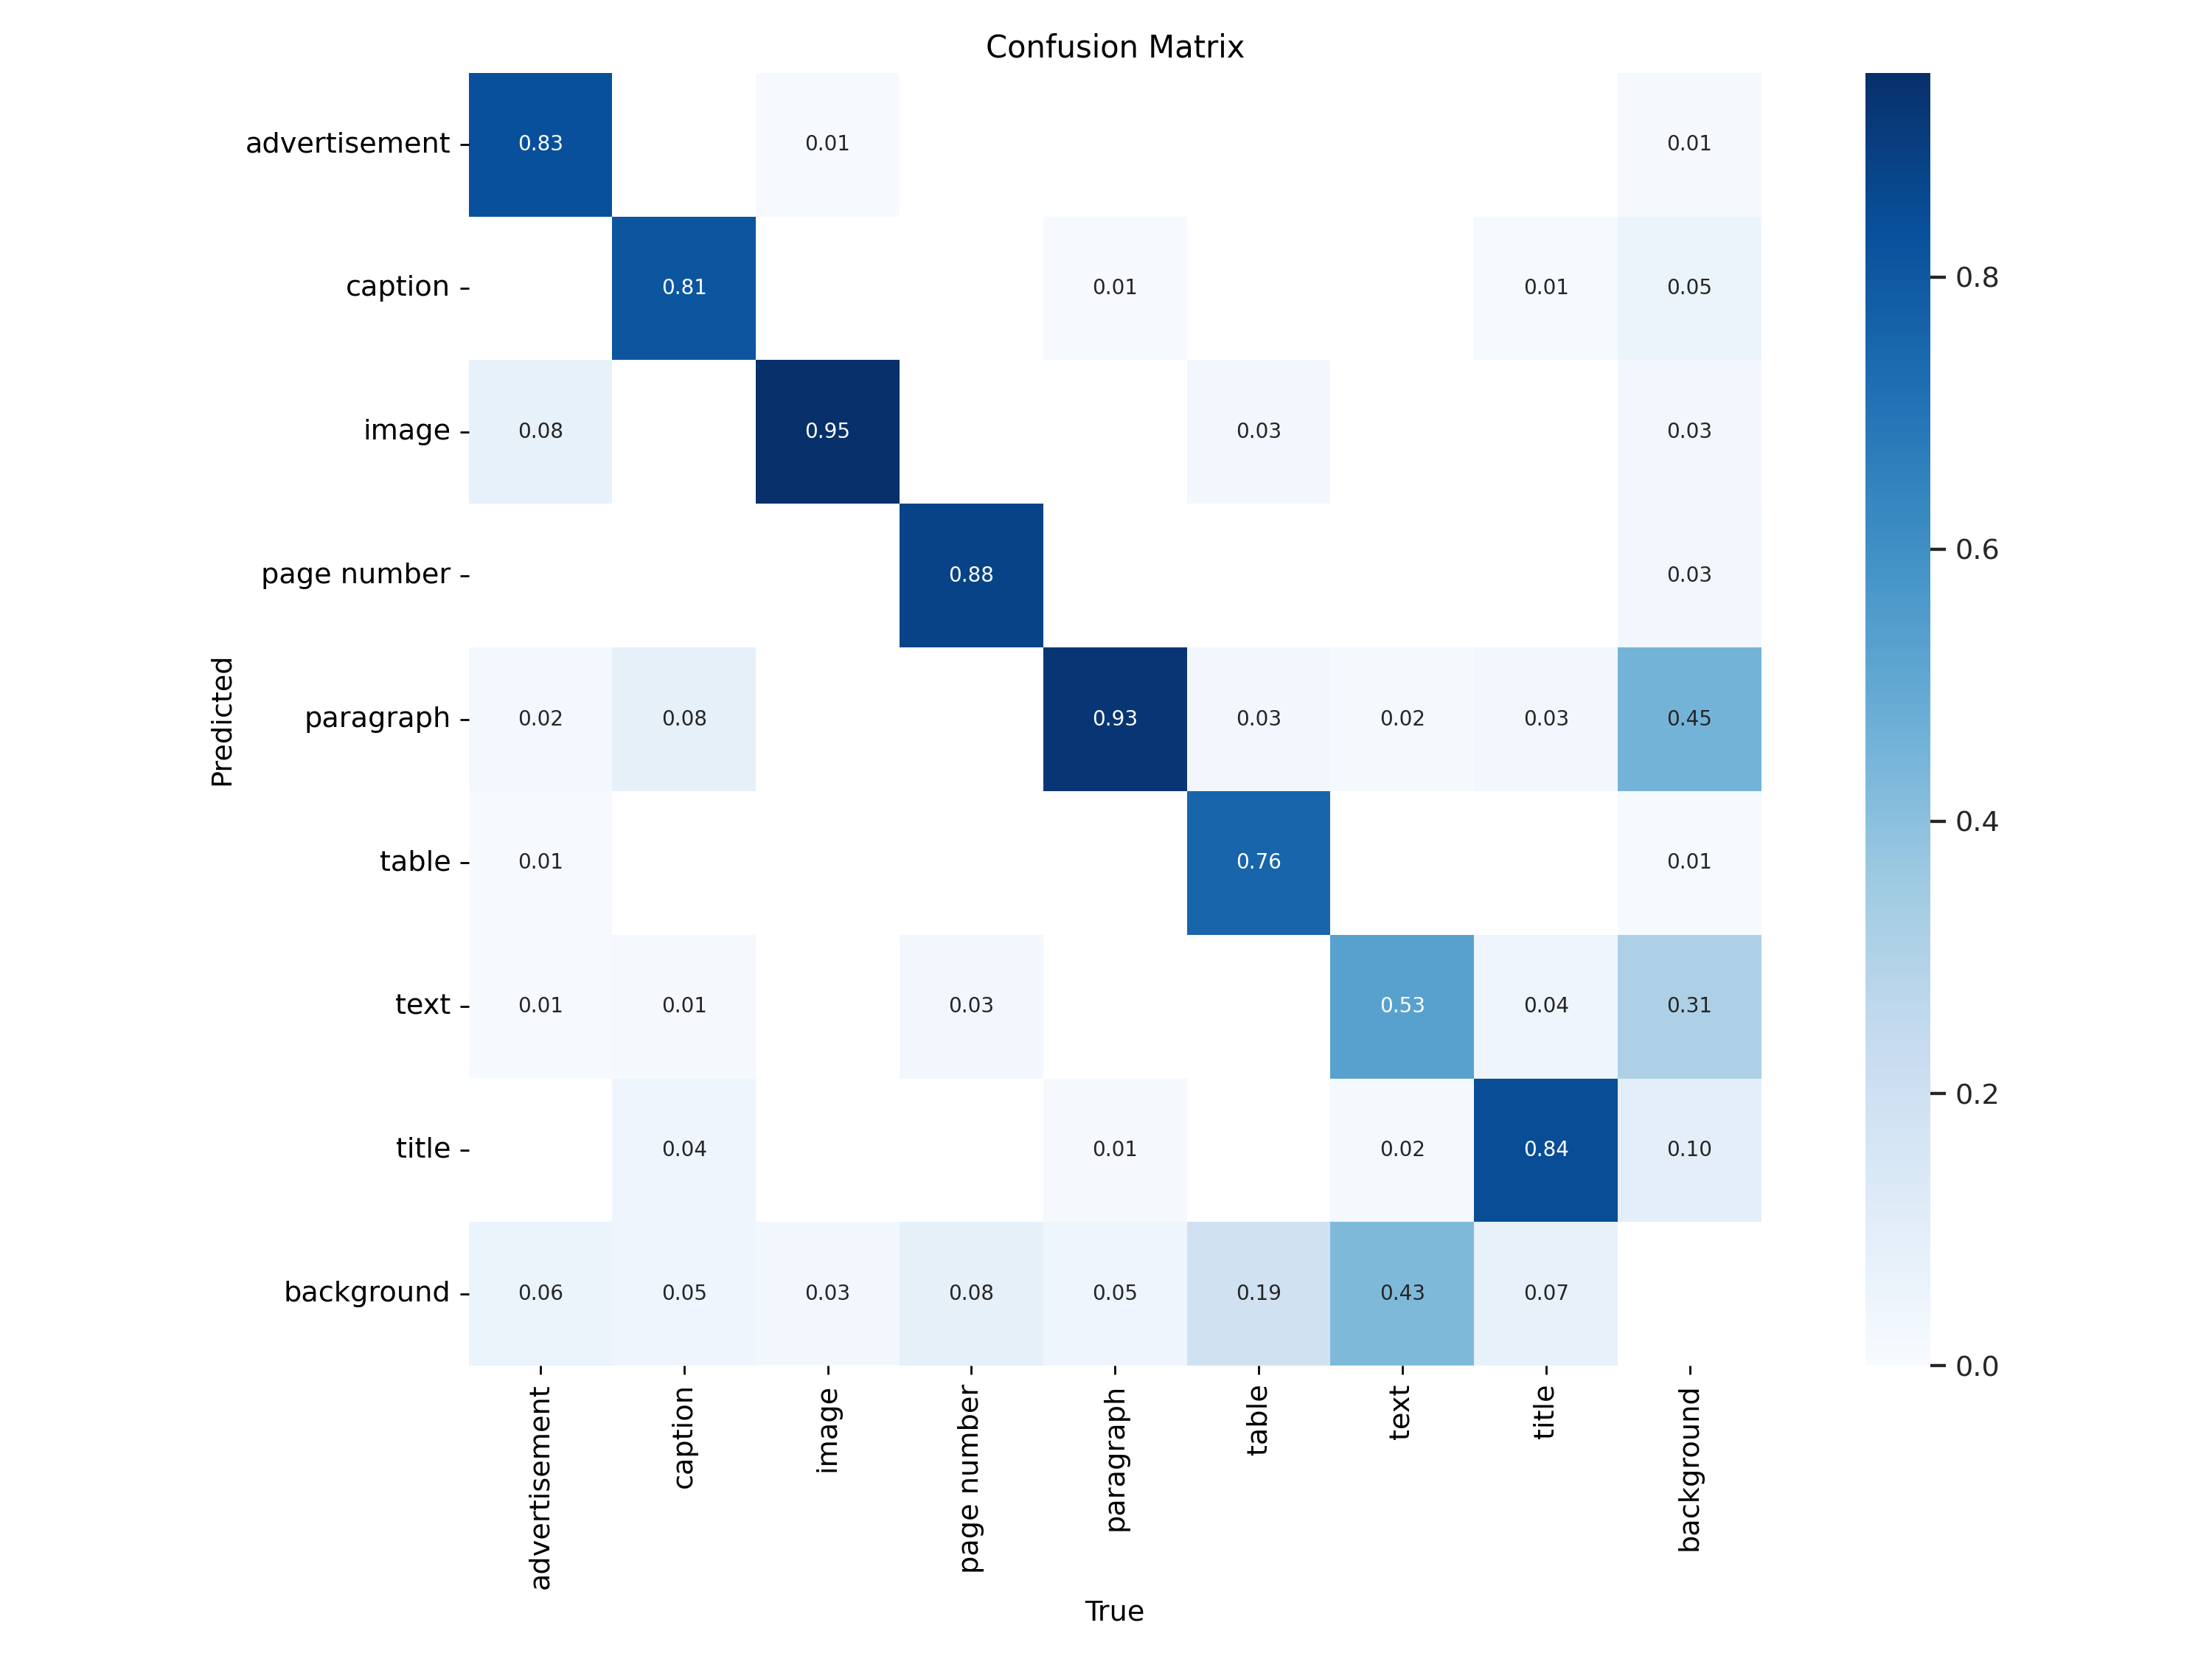

In [12]:
from IPython.display import display, Image

Image(filename="/kaggle/working/yolov5/runs/val-seg/custom-dataset/confusion_matrix.png", width=900)

# **Box & Mask Precision-Recall Graph**

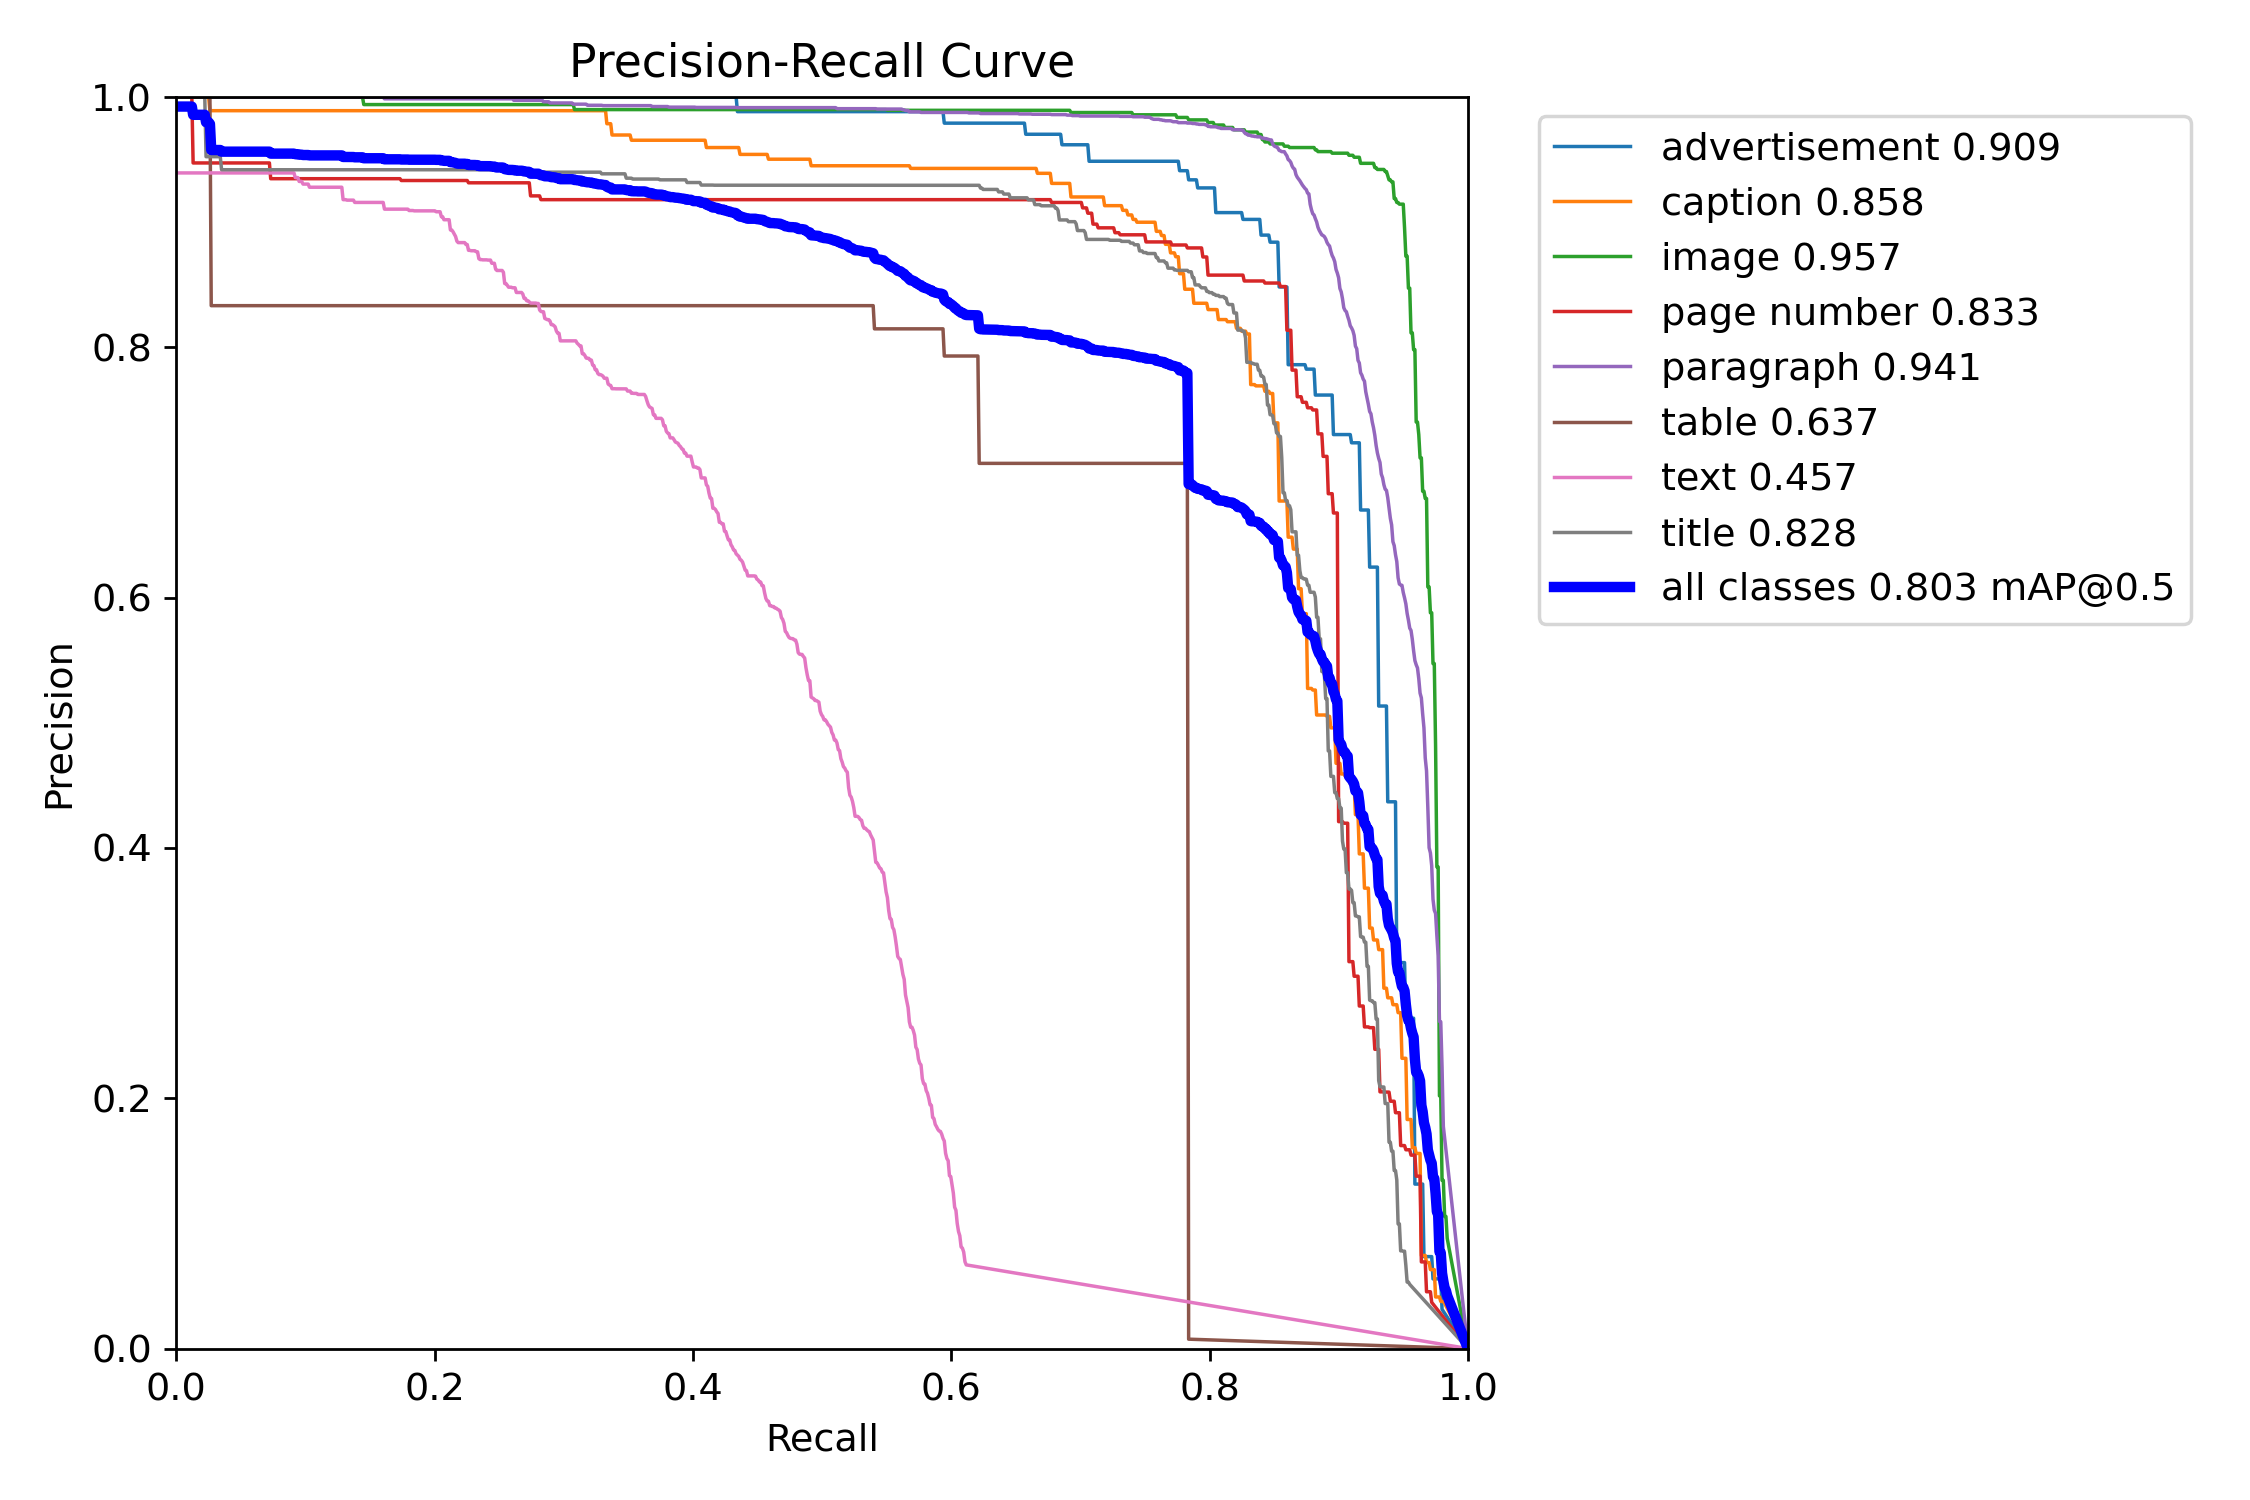

In [11]:
Image(filename="/kaggle/working/yolov5/runs/val-seg/custom-dataset/BoxPR_curve.png", width=900)

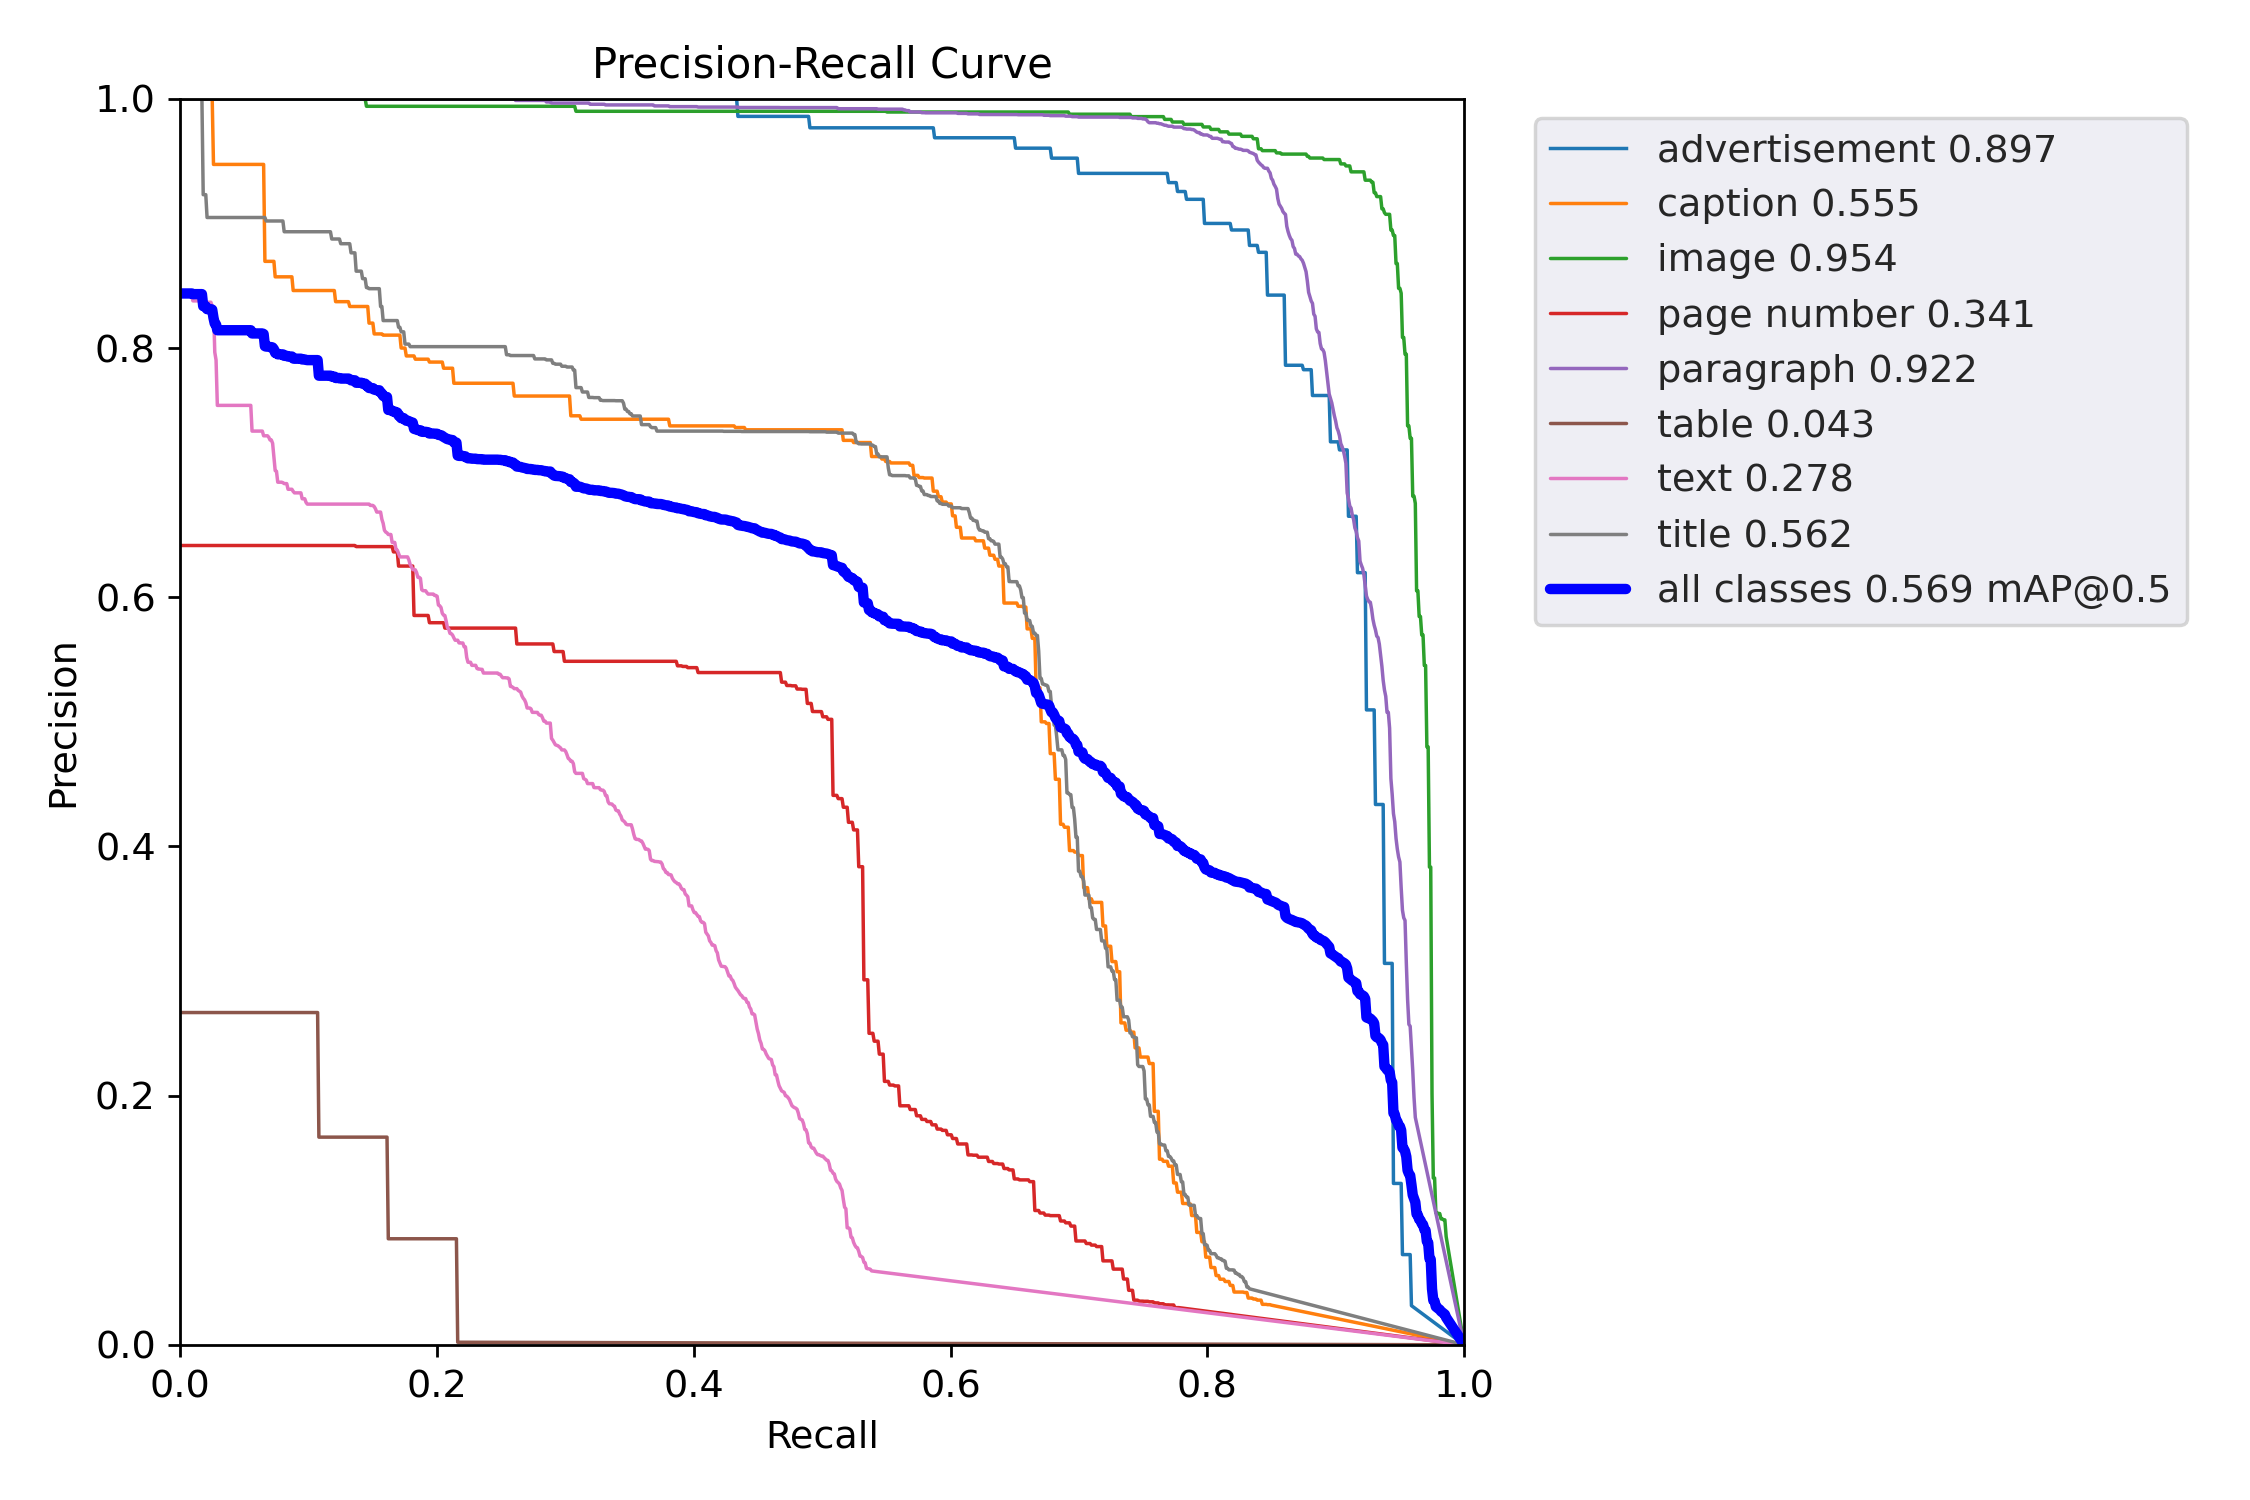

In [13]:
Image(filename="/kaggle/working/yolov5/runs/val-seg/custom-dataset/MaskPR_curve.png", width=900)

# Box & Mask F1 Score Graph

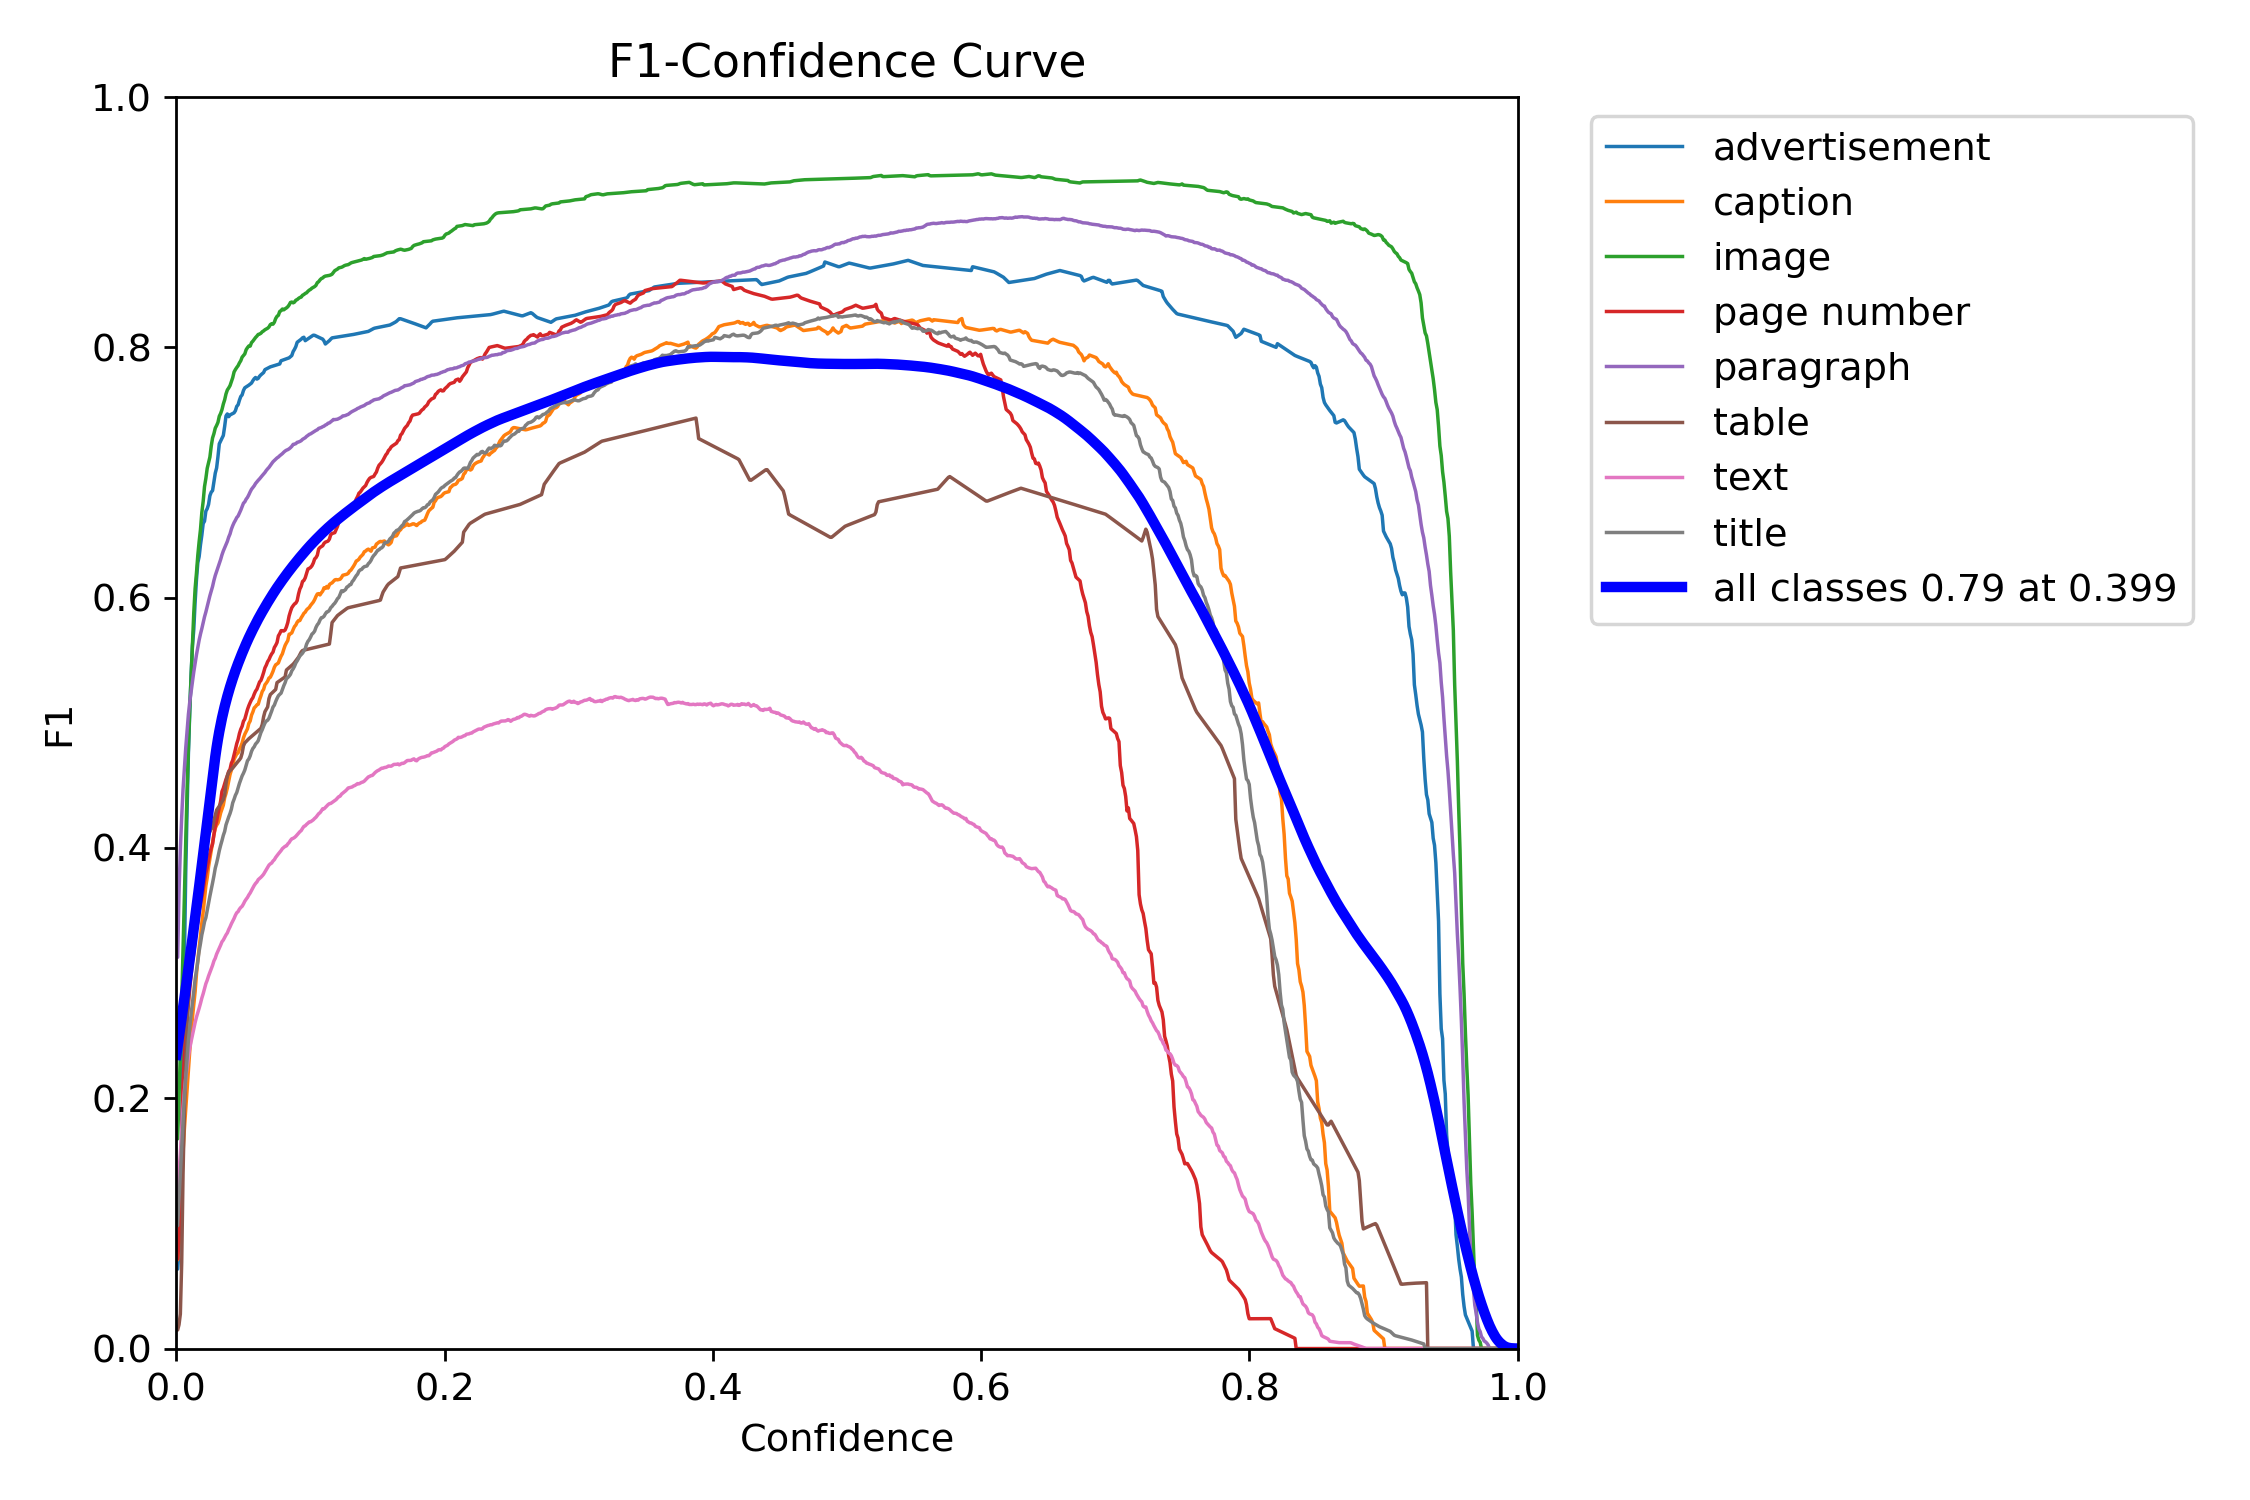

In [14]:
Image(filename="/kaggle/working/yolov5/runs/val-seg/custom-dataset/BoxF1_curve.png", width=900)

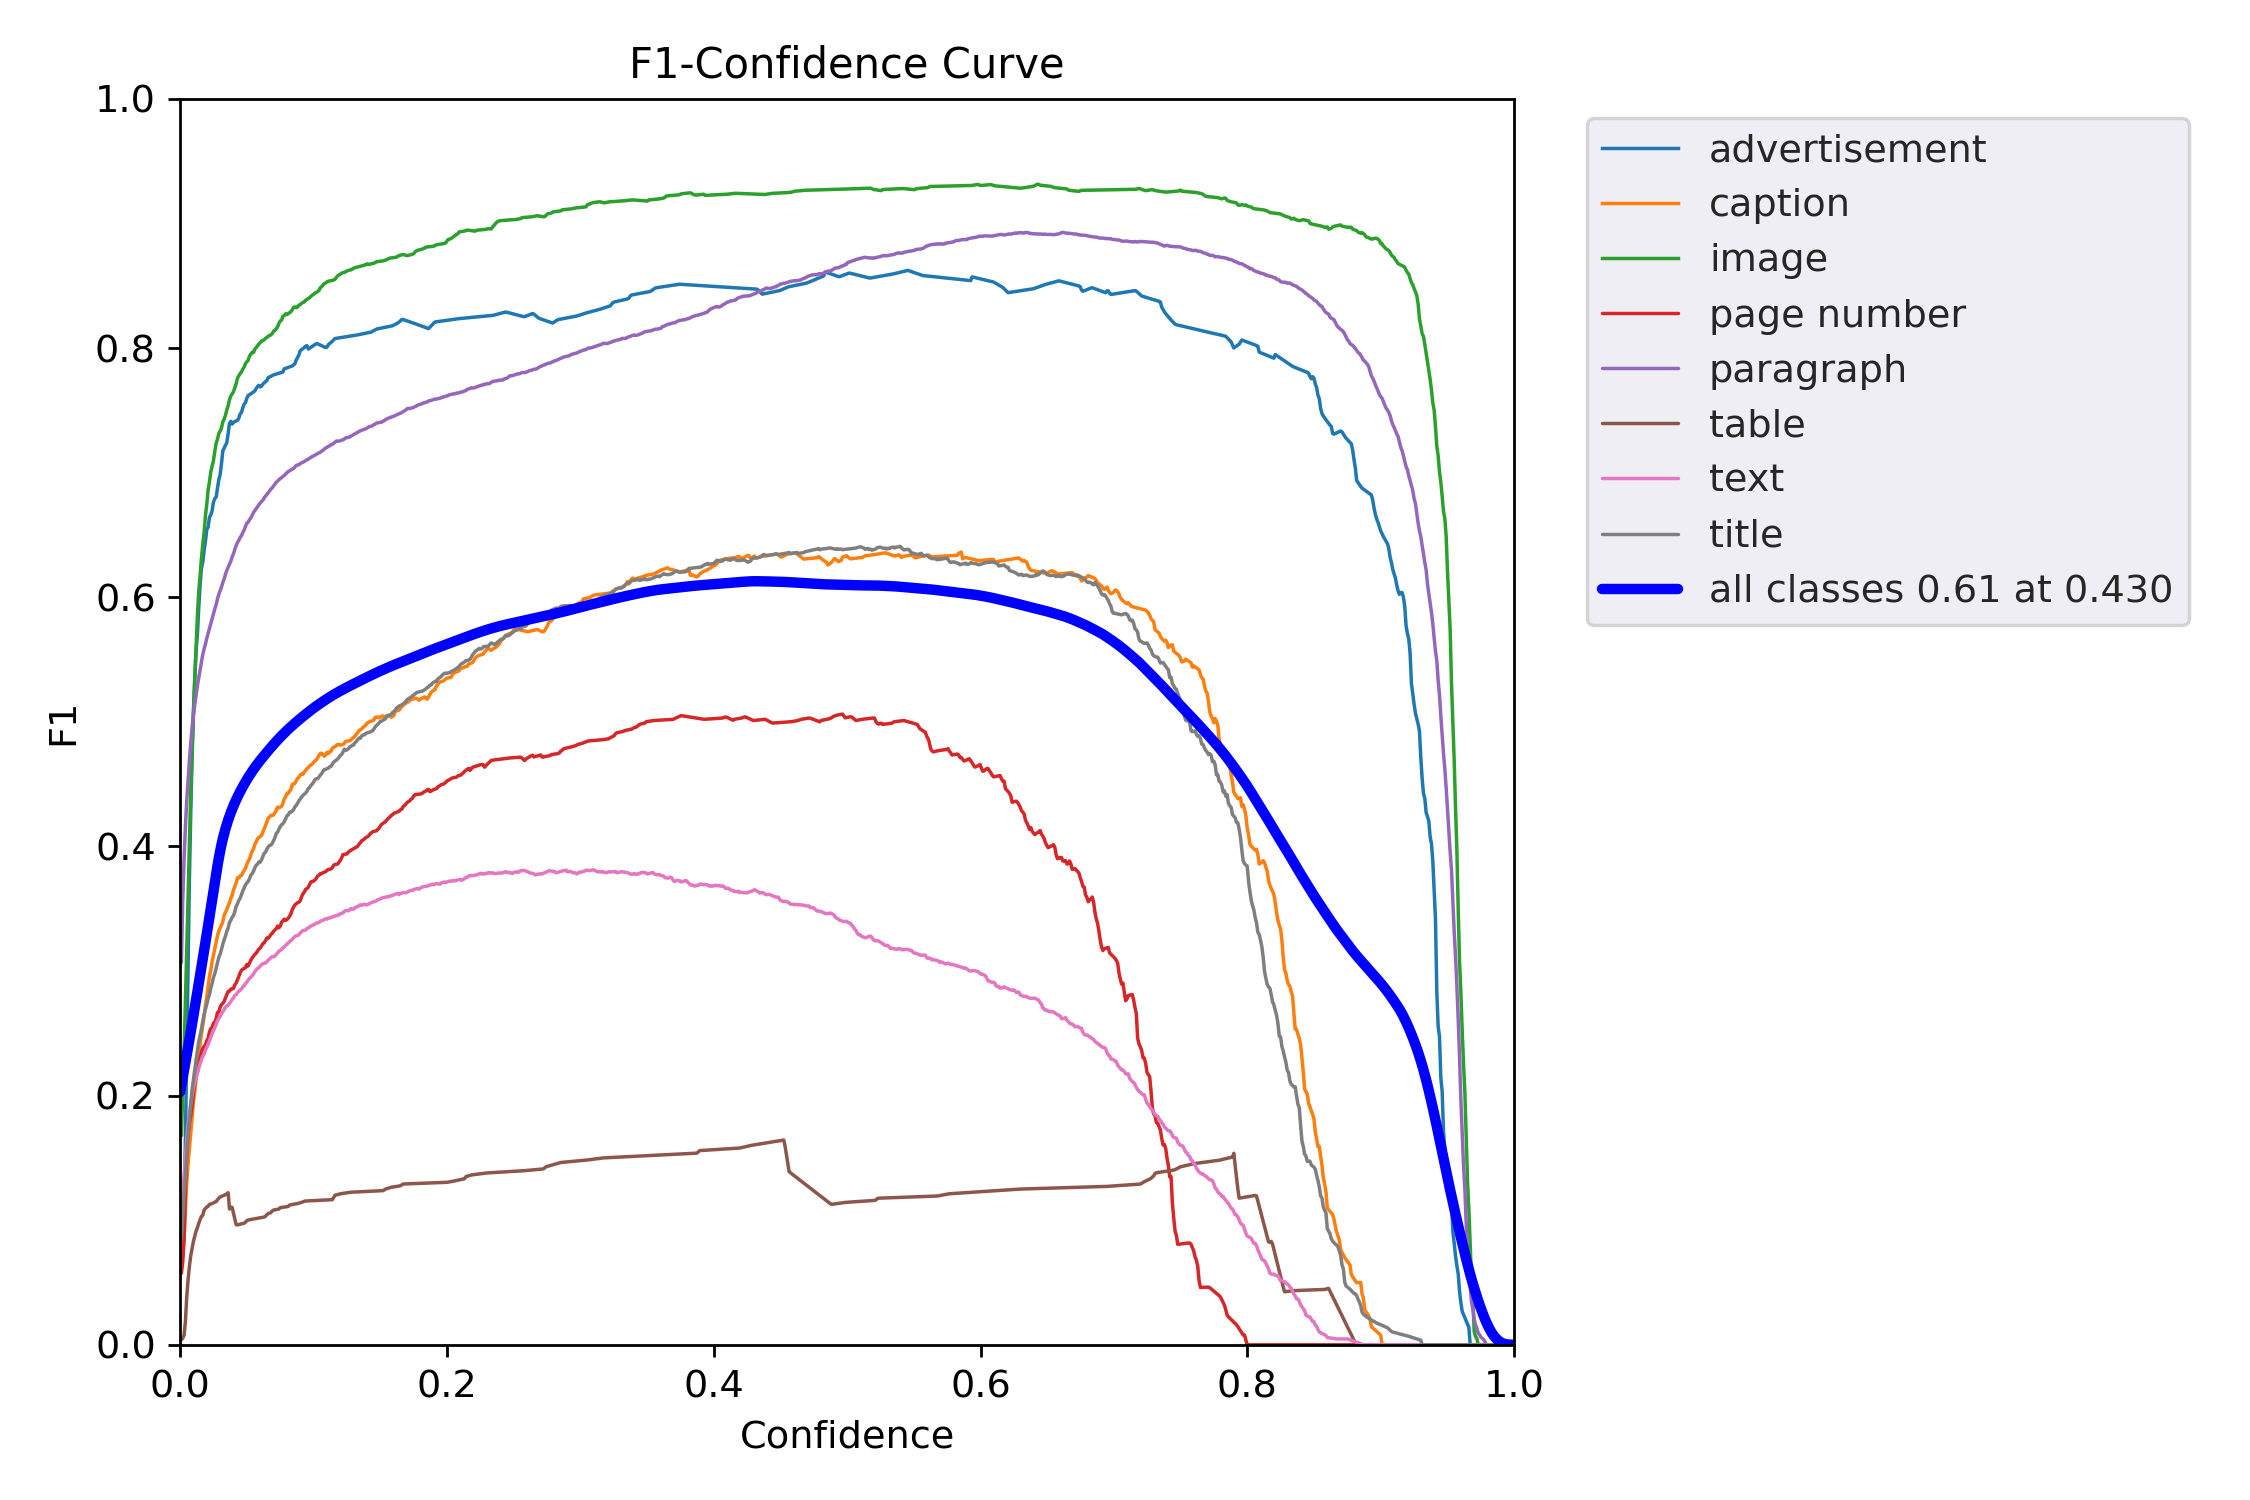

In [15]:
Image(filename="/kaggle/working/yolov5/runs/val-seg/custom-dataset/MaskF1_curve.png", width=900)

# **Inference**

In [25]:
!python /kaggle/working/yolov5/segment/predict.py --weights /kaggle/working/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source /kaggle/working/yolov5/FYDP-19/test/images/ --img 320  --name custom-dataset

segment/predict: weights=['/kaggle/working/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/kaggle/working/yolov5/FYDP-19/test/images/, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7417301 parameters, 0 gradients, 25.7 GFLOPs
image 1/217 /kaggle/working/yolov5/FYDP-19/test/images/9d96dc75-1865-473b-93ed-44c2312483e1-at1000_jpg.rf.e06f7cf0d88509e058dbb41754811a71.jpg: 320x320 1 advertisement, 6.8ms
image 2/217 /kaggle/working/yolov5/FYDP-19/test/images/9fa08fb7-f75d-

# **Making Zip & Download Prediction**

In [26]:
import shutil
import zipfile

source_folder = '/kaggle/working/yolov5/runs/predict-seg/custom-dataset6'
zip_filename = '/kaggle/working/yolov5_Prediction'
shutil.make_archive(zip_filename, 'zip', source_folder)

'/kaggle/working/yolov5_Prediction.zip'